# Importar Principais Bibliotecas

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import datasets

import numpy as np
import matplotlib.pyplot as plt

# Remover Imagens com formatos diferentes

In [19]:
#Inicio
import os
import cv2
import imghdr

In [20]:
directorio = 'data' 

In [21]:
#Todas as imagens do dataSet estao no formato "png"
extensao_img = ['png']

In [22]:
#Verficar se cada uma das imagens esta no formato "png", caso nao sera removida
for imagens in os.listdir(directorio): 
    for final_img in os.listdir(os.path.join(directorio, imagens)):
        caminho_img = os.path.join(directorio, imagens, final_img)
        img = cv2.imread(caminho_img)
        #Salvar a extensao da imagem em tipo
        tipo = imghdr.what(caminho_img)
        if tipo not in extensao_img: 
            print('Image is not png extension {}'.format(caminho_img))
            os.remove(caminho_img)

# Carregar os dados

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
#Estabelecer o conjunto de dados(sem os rotulos que serao criados posteriormente)
data = tf.keras.utils.image_dataset_from_directory('data')

Found 601 files belonging to 4 classes.


In [13]:
#Garantir o acesso ao pipiline dos dados
data_count = data.as_numpy_iterator()

In [14]:
#batch e composto pelas imagens e rotulos
batch = data_count.next()

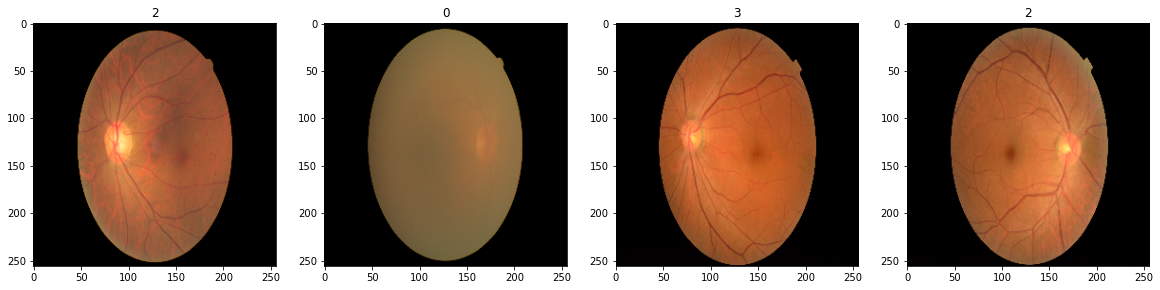

In [15]:
#Batches(normal, cataracta, glaucoma, retina)

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for index, img in enumerate(batch[0][:4]):
    ax[index].imshow(img.astype(int))
    ax[index].title.set_text(batch[1][index])

In [ ]:
#Fim

# Pre processamento dos dados

Dividing our pixels images values by the maximium scale to be between 0 and 1 instead of 0 to 255, it will improve the model performance in time of train

x - imagens

y - labels(target variables)

In [23]:
data = data.map(lambda x,y: (x/255, y))

In [24]:
#pick up the first batch in the dataset
data.as_numpy_iterator().next()

(array([[[[2.6960785e-03, 0.0000000e+00, 0.0000000e+00],
          [1.1688112e-02, 0.0000000e+00, 3.9215689e-03],
          [7.5061275e-03, 1.5165441e-03, 3.9215689e-03],
          ...,
          [3.9215689e-03, 0.0000000e+00, 2.7420344e-03],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [7.8431377e-03, 3.9215689e-03, 3.9215689e-03]],
 
         [[7.7665439e-03, 3.6764706e-03, 3.9215689e-03],
          [7.6133576e-03, 2.4509805e-04, 3.9215689e-03],
          [9.4515933e-03, 1.0723039e-04, 3.9215689e-03],
          ...,
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [7.8431377e-03, 4.7487745e-04, 3.9215689e-03],
          [7.6593140e-05, 0.0000000e+00, 0.0000000e+00]],
 
         [[4.2126225e-03, 1.5165441e-03, 2.6960785e-03],
          [7.8431377e-03, 3.6764706e-03, 3.9215689e-03],
          [2.9564952e-03, 0.0000000e+00, 1.9914217e-03],
          ...,
          [3.1709559e-03, 0.0000000e+00, 9.6507353e-04],
          [2.4509805e-03, 2.1752452e-

# Dividir os Dados em Treino e Teste

In [26]:
from sklearn.model_selection import train_test_split

treino_img, teste_img, treino_labels, teste_labels = train_test_split(imagens, labels, test_size=0.2, random_state=42)

NameError: name 'labels' is not defined